### Reinforcement Learning
### Racetrack Problem

Problem Statement Link : https://www.cmi.ac.in/~madhavan/courses/aml2019/assignment2/

 
    In the problem statement two tracks are given(Track 2 and Track 3 in my list)
    I have used another track representation of my own(Track 1 in my list)

    Steps:
    1. Plot each of the three tracks (Just to see the tracks)
    2. Implement Monte-Carlo and SARSA (Environment remains same in both the case, so we have one environment class)
    3. Plot of how we proceed towards the finishing line in an episode
    4. Function to get results for each starting position for any track -(It takes long time)
    5. For different epsilon, plot the convergence rate(mean_return vs no of episodes) 
    6. For different step size plot the converge rate in case of SARSA
    7. Compare SARSA and Monte Carlo approaches

    Asked, S for start, F for finish, O for an open cell within the racetrack, B for a cell outside the boundary.
    Used, for start 2, for end 3, for open cell within track 0 and for outside the track 1 
    The coordinate may be out of track or may be out of max-min range of the plot. The first case, we denote that out of track thing as grass

### Importing the necessary libraries

In [ ]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Representation of the tracks

In [ ]:
### We have 3 tracks. The task is to compute the optimal policy from each starting state for each of the tracks.
### The track 2 and 3 are as given in the problem statement.
### Track 1 is one of my own representation of track.

TRACK_VALUE = 0 #for an open cell within the racetrack
GRASS_VALUE = 1 #for a cell outside the boundary.
START_VALUE = 2 #for start
END_VALUE = 3   #for finish
AGENT_VALUE = 4

TRACKS = {

  "track_1": np.array([
    [1, 1, 0, 0, 0, 3],
    [1, 1, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [2, 2, 2, 1, 1, 1]

  ], dtype=np.int32),
    
   "track_2": np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
   
  ], dtype=np.int32),

  "track_3": np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32)

}
RACETRACK_1 = "track_1"
RACETRACK_2 = "track_2"
RACETRACK_3 = "track_3"



    For each of the track we have more than one starting positions.
    We choose the starting postion randomly.
    We can also ask for starting postion as input and then proceed.

### Creating the Racetrack class
    It contains the information of the environment.
    How the environment will react for an action of the agent.
    Here we set up that environment information.

In [ ]:

class Racetrack:
    STEP_REWARD = -1
    OUT_OF_BOUNDS_REWARD = -50
    def __init__(self, racetrack):

        self.racetrack = racetrack
        self.start_coordinates = None
        self.get_start_positions()
    
        self.position = None
        self.velocity = None
        self.done = None
        self.reset()
        
    def get_start_positions(self):
        """
        Select start position by random (from a list of start positions).
        :return:      None.
        """
    
        self.start_coordinates = []
        x_coordinates, y_coordinates = np.where(self.racetrack == 2)
    
        for x, y in zip(x_coordinates, y_coordinates):
    
          self.start_coordinates.append((x, y))
          
    def act(self, x_change, y_change):
        """
        Act in the environment.
        :param x_change:    X acceleration.
        :param y_change:    Y acceleration.
        :return:            None.
        """
    
        assert not self.done
    
        # validation actions
        assert -1 <= x_change <= 1
        assert -1 <= y_change <= 1
    
        # update velocity
        self.velocity = (self.velocity[0] + x_change, self.velocity[1] + y_change)
        self.correct_velocity()
    
        # move car
        last_position = self.position
        self.update_position(self.velocity)
        
        # check if finished
        if self.check_finish():
          self.done = True
          return self.STEP_REWARD
    
        # check for invalid position
        invalid_position = False
    
        if self.check_position_out_of_bounds() or self.check_position_grass():
          invalid_position = True
          self.correct_invalid_position(last_position)
          self.correct_same_position()
    
        # check if finished again
        if self.check_finish():
          self.done = True
    
          if invalid_position:
            return self.OUT_OF_BOUNDS_REWARD
          else:
            return self.STEP_REWARD
    
        if invalid_position:
          return self.OUT_OF_BOUNDS_REWARD
        else:
          return self.STEP_REWARD
      
    def update_position(self, velocity):
        """
        Update position based on the velocity.
        :param velocity:      Velocity.
        :return:    None.
        """
        
        self.position = (self.position[0] - velocity[0], self.position[1] + velocity[1])
    
    def check_finish(self):
        """
        Check if the race car reached finish.
        :return:      None.
        """
        tmp_position = self.position
    
        if self.position[0] < 0 or self.position[0] >= self.racetrack.shape[0]:
          return False
    
        if self.position[1] < 0:
          tmp_position = (self.position[0], 0)
        elif self.position[1] >= self.racetrack.shape[1]:
          tmp_position = (self.position[0], self.racetrack.shape[1] - 1)
    
        if self.racetrack[tmp_position] == 3:
          return True
        else:
          return False
      
    def correct_velocity(self):
        """
        Correct race car velocity. It cannot be (0, 0) and must be between 0 and 4 for both axes.
        :return:    None.
        """
    
        # maybe correct the x component
        if self.velocity[0] < 0:
          self.velocity = (0, self.velocity[1])
        elif self.velocity[0] > 4:
          self.velocity = (4, self.velocity[1])
    
        # maybe correct the y component
        if self.velocity[1] < 0:
          self.velocity = (self.velocity[0], 0)
        elif self.velocity[1] > 4:
          self.velocity = (self.velocity[0], 4)
    
        # make sure the velocity is not 0
        if self.velocity == (0, 0):
          if random.choice([True, False]):
            self.velocity = (1, 0)
          else:
            self.velocity = (0, 1)
         
    def check_position_out_of_bounds(self):
        """
        Check if the race car is out of bounds.
        :return:    True if out of bounds, otherwise False.
        """
    
        return self.position[0] < 0 or self.position[0] >= self.racetrack.shape[0] or self.position[1] < 0 or \
               self.position[1] >= self.racetrack.shape[1]
    

    def check_position_grass(self):
        """
        Check if the race car is on grass.
        :return:    True if on grass, otherwise False.
        """

        return self.racetrack[self.position] == GRASS_VALUE
    
    def correct_invalid_position(self, last_position):
        """
        Correct position that is out of bounds or on grass.
        :param last_position:       Last position.
        :return:                    None.
        """
    
        self.position = last_position
        self.velocity = (0, 0)
    
    def correct_same_position(self):
        """
        Move the car by at least one square to its target (so that each episode eventually finishes).
        :return:    None.
        """
    
        self.update_position((1, 0))
    
        if self.check_position_out_of_bounds() or self.check_position_grass():
          self.update_position((-1, 1))
          
    def reset(self):
        """
        Reset environment.
        :return:      None.
        """
    
        self.position = random.choice(self.start_coordinates)
        self.velocity = (0, 0)
        self.done = False
        
    def get_state(self):
        """
        Get current state (position and velocity).
        :return:    Current state.
        """
    
        return self.position[0], self.position[1], self.velocity[0], self.velocity[1]
   
     
      
    def show_racetrack(self, save_path=None, show_legend=True):
        
        #plt.figure(figsize=(15,5)) 
        fig, ax = plt.subplots(figsize=(15, 5))
        im =  plt.imshow(self.racetrack)

        plt.axis("off")

        if show_legend:
          values = np.unique(self.racetrack.ravel())
          labels = {
            START_VALUE: "start",
            END_VALUE: "end",
            TRACK_VALUE: "track",
            GRASS_VALUE: "grass"
          }
          colors = [im.cmap(im.norm(value)) for value in values]
          patches = [mpatches.Patch(color=colors[i], label=labels[values[i]]) for i in range(len(values))]
          plt.legend(handles=patches, loc=4)

        if save_path is not None:
          plt.savefig(save_path, bbox_inches="tight")

        plt.show()

def update_mean(value, mean, count):
  """
  Update value of a streaming mean.
  :param value:     New value.
  :param mean:      Mean value.
  :param count:     Number of values averaged.
  :return:
  """

  return (value - mean) / (count + 1)

### Creating the Montecarlo Class
    It contains the Montecarlo method followed to obtain the optimal policy

In [ ]:
#startting the on policy monte carlo
class MonteCarlo:

  NUM_ACTIONS = 9
  NUM_SPEEDS = 5
  ACTION_TO_ACCELERATION = np.array([[1, 1], [0, 1], [1, 0], [0, 0], [-1, 0], [0, -1], [1, -1], [-1, 1], [-1, -1]])

  def __init__(self, env, epsilon, init=-100):
    """
    Initialize a Monte Carlo agent for the Racetrack environment.
    Each state is visited only once in a single episode, so the first-visit / every-visit distinction does not apply.
    :param env:         An instance of the racetrack environment.
    :param epsilon:     Constant for an epsilon-greedy policy.
    :param init:        Initial action values.
    """

    self.env = env
    self.epsilon = epsilon
    self.init = init

    self.action_values = None
    self.action_counts = None
    self.policy = None
    self.reset()

  def play_episode(self, explore=True, learn=True):
    """
    Play an episode.
    :param explore:     Use exploration policy.
    :param learn:       Update action counts and values.
    :return:            Total return of the episode.
    """

    sequence = []

    while not self.env.done:

      state = self.env.get_state()

      if explore:
        action = self.explore(self.policy[state])
      else:
        action = self.policy[state]

      reward = self.env.act(*self.action_to_acceleration(action))

      sequence.append((state, action, reward))

    returns = np.zeros(len(sequence))

    for i in reversed(range(len(sequence))):
      for j in range(i + 1):
        returns[j] += sequence[i][2]

    if learn:
      for i in range(len(sequence)):

        state = sequence[i][0]
        action = sequence[i][1]
        state_action = state + (action,)
        ret = returns[i]

        self.action_values[state_action] += update_mean(ret, self.action_values[state_action],
                                                              self.action_counts[state_action])
        self.action_counts[state_action] += 1

    return returns[0], sequence

  def reset(self):
    """
    Reset agent.
    :return:    None.
    """

    self.action_values = \
      np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS,
                self.NUM_ACTIONS), dtype=np.float32) - self.init
    self.action_counts = \
      np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS,
                self.NUM_ACTIONS), dtype=np.int32)
    self.policy = np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS),
                           dtype=np.int32)

  def update_policy(self):
    """
    Update epsilon-greedy policy using current action values.
    :return:    None.
    """

    # play action with maximum action value
    self.policy = np.argmax(self.action_values, axis=-1)

  def action_to_acceleration(self, action):
    """
    Translate action index into acceleration in x and y axes.
    :param action:    Action index.
    :return:          Acceleration in x and y axes.
    """

    return self.ACTION_TO_ACCELERATION[action]

  def explore(self, action):
    """
    Select a random action with probability epsilon.
    :param action:    Exploitation action.
    :return:          Exploration action.
    """

    if np.random.uniform(0, 1) < self.epsilon:
      return np.random.randint(0, self.NUM_ACTIONS)
    else:
      return action

  def show_sequence(self, sequence, save_path=None, show_legend=True):
    """
    Show positions visited in a sequence.
    :param sequence:        Sequence of tuples: (state, action, reward).
    :param save_path:       Where to save the plot.
    :param show_legend:     Show legend.
    :return:                None.
    """

    track = self.env.racetrack.copy()

    for item in sequence:
      state = item[0]
      track[state[0], state[1]] = 4

    fig, ax = plt.subplots(figsize=(15, 5))

    im = plt.imshow(track)

    plt.axis("off")

    if show_legend:
      values = np.unique(track.ravel())
      labels = {
        START_VALUE: "start",
        END_VALUE: "end",
        TRACK_VALUE: "track",
        GRASS_VALUE: "grass",
        AGENT_VALUE: "agent"
      }
      colors = [im.cmap(im.norm(value)) for value in values]
      patches = [mpatches.Patch(color=colors[i], label=labels[values[i]]) for i in range(len(values))]
      plt.legend(handles=patches, loc=4)

    if save_path is not None:
      plt.savefig(save_path, bbox_inches="tight")

    plt.show()

### Solve Racetrack  
    Creating a function which will give the mean return for different episodes for a starting position for any given track
    We fix the no of training episode. We learn the optimal policy during this training.

In [ ]:
TRAINING_EPISODES      = 500000
EVALUATION_EPISODES  = 100
EVALUATION_FREQUENCY = 10000    ### We evaluate the mean return after 10000 episodes. Average of the returns of the 10000 episodes.

def solve_track_by_montecarlo(race_track,epsilon):
    assert race_track in TRACKS.keys()
    
    #create environment
    track = TRACK[race_track]
    
    env = Racetrack(track)
    
    #create agent
    mc = MonteCarlo(env,epsilon)
    state = env.get_state()
    print("starting state:",state) 
    print("Training for {:d} Episodes".format(TRAINING_EPISODES))
    
    mean_return_list=[]
    no_of_episodes=[]
    for episode_idx in range(TRAINING_EPISODES):

        # play episode
        mc.play_episode()
        mc.update_policy()

        env.reset()

        # maybe evaluate without exploration
        if episode_idx > 0 and episode_idx % EVALUATION_FREQUENCY == 0:

            returns = []
            
            for _ in range(EVALUATION_EPISODES):

                ret, _ = mc.play_episode(explore=False, learn=False)
                #print(ret)
                returns.append(ret)

                env.reset()

            mean_return = np.mean(returns)
            #print("mean return after {:d} episodes: {:.2f}".format(episode_idx, mean_return))
            
            mean_return_list.append(mean_return)
            no_of_episodes.append(episode_idx)
    #print("Mean returns after 10000 episodes interval from starting state:",state)                 
    return ((mean_return_list,no_of_episodes))



### Function to get the result for all the starting positions for any given track

    For SARSA we just need to change the class as SARSA and give the step size.

In [ ]:
# From each start position of a track, print the return for an episode
def for_each_starting_coordinate(race_track,epsilon): 
    assert race_track in TRACK.keys()
    track = TRACK[race_track]
    
    env = Racetrack(track)
    
    #create agent
    mc = MonteCarlo(env,epsilon)
    state = env.get_state()
    print("starting state:",state) 
    print("Training for {:d} Episodes".format(TRAINING_EPISODES))
    
    for i, start_coordinates in enumerate(env.start_coordinates):
    #create environment
   
        mean_return_list=[]
        no_of_episodes=[]
        for episode_idx in range(TRAINING_EPISODES):

          # play episode
          mc.play_episode()
          mc.update_policy()

          env.reset()

          # maybe evaluate without exploration
          if episode_idx > 0 and episode_idx % EVALUATION_FREQUENCY == 0:

              returns = []
              
              for _ in range(EVALUATION_EPISODES):

                  ret, _ = mc.play_episode(explore=False, learn=False)
                  #print(ret)
                  returns.append(ret)

                  env.reset()

              mean_return = np.mean(returns)
              #print("mean return after {:d} episodes: {:.2f}".format(episode_idx, mean_return))
              
              mean_return_list.append(mean_return)
              no_of_episodes.append(episode_idx)
         #print("Mean returns after 10000 episodes interval from starting state:",state)                 
        return ((mean_return_list,no_of_episodes))

        # print("start_coordinates:",start_coordinates)
        # print("Return: {:.2f}".format(mean_return))

### Class for SARSA

    As mentioned earlier, the environment remains same. We change the update rule. In the function play episode, the main changes are made.

In [ ]:
class SARSA:

  NUM_ACTIONS = 9
  NUM_SPEEDS = 5
  ACTION_TO_ACCELERATION = np.array([[1, 1], [0, 1], [1, 0], [0, 0], [-1, 0], [0, -1], [1, -1], [-1, 1], [-1, -1]])

  def __init__(self, env,epsilon,gamma=0.8,alpha, init=-100):

    self.env = env
    self.epsilon = epsilon
    self.alpha = alpha
    self.gamma = gamma
    self.init = init

    self.action_values = None
    self.action_counts = None
    self.policy = None
    self.reset()

  def play_episode(self,explore=True,learn=True):
        sequence = []
        state = self.env.get_state() #get the initial state
        #print(self.env.start_coordinates)
        if explore== False and learn==False:
          while not self.env.done:
            action = self.policy[state]

        while not self.env.done:
            if explore:
                action = self.explore(self.policy[state])
            else:
                action = self.policy[state]
            reward = self.env.act(*self.action_to_acceleration(action))
            sequence.append((state,action,reward))
            state=self.env.get_state()
            ## In case we are not at the finishing point
            try:
                action = self.policy[state]
            ## In case we are at the finishing point
            except IndexError:  
                break
            #print(state)
            #new_action = self.policy[new_state]
            state_action = state + (action,)
            x_change,y_change= self.action_to_acceleration(action)
            self.env.velocity = (self.env.velocity[0] + x_change, self.env.velocity[1] + y_change)
            self.env.correct_velocity()
    
            last_position = self.env.position
            # Ensure that we are in the track
            if self.env.check_position_out_of_bounds() or self.env.check_position_grass():
                self.env.correct_invalid_position(last_position)
            self.env.update_position(self.env.velocity)
            # Get the next state
            next_state=last_position+self.env.velocity
            # Get the next action
            next_action= self.policy[next_state]
            next_state_action = next_state + (next_action,)
            #Q(s, a) = Q(s, a) + alpha*[r + gamma * Q(s', a') - Q(s, a)]
            self.action_values[state_action] += (self.alpha*reward)+(self.alpha*self.gamma*self.action_values[next_state_action])-(self.alpha*self.action_values[state_action])
            state  = next_state
            action = next_action
        returns = np.zeros(len(sequence))
        for i in reversed(range(len(sequence))):
            for j in range(i + 1):
                returns[j] += sequence[i][2]
        return returns[0], sequence
            
  def reset(self):
    """
    Reset agent.
    :return:    None.
    """

    self.action_values = \
      np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS,
                self.NUM_ACTIONS), dtype=np.float32) - self.init
    self.action_counts = \
      np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS,
                self.NUM_ACTIONS), dtype=np.int32)
    self.policy = np.zeros((self.env.racetrack.shape[0], self.env.racetrack.shape[1], self.NUM_SPEEDS, self.NUM_SPEEDS),
                           dtype=np.int32)
    #print(self.policy.shape)
  def update_policy(self):
    """
    Update epsilon-greedy policy using current action values.
    :return:    None.
    """

    # play action with maximum action value
    self.policy = np.argmax(self.action_values, axis=-1)

  def action_to_acceleration(self, action):
    """
    Translate action index into acceleration in x and y axes.
    :param action:    Action index.
    :return:          Acceleration in x and y axes.
    """

    return self.ACTION_TO_ACCELERATION[action]
  

  def explore(self, action):
    """
    Select a random action with probability epsilon.
    :param action:    Exploitation action.
    :return:          Exploration action.
    """

    if np.random.uniform(0, 1) < self.epsilon:
      return np.random.randint(0, self.NUM_ACTIONS)
    else:
      return action
  

### Solve Racetrack by SARSA

In [ ]:
TRAINING_EPISODES    = 500000
EVALUATION_EPISODES  = 100
EVALUATION_FREQUENCY = 10000

#start solving the race track problem
def solve_track_by_SARSA(race_track,epsilon,gamma,alpha):
    assert race_track in TRACK.keys()
    
    #create environment
    track = TRACK[race_track]
    
    env = Racetrack(track)
    
    #create agent
    td = SARSA(env,epsilon,gamma=0.8,alpha)
    state = env.get_state()
    print("starting state:",state) 
    print("Training for {:d} Episodes".format(TRAINING_EPISODES))
    
    mean_return_list=[]
    no_of_episodes=[]
    for episode_idx in range(TRAINING_EPISODES):

        # play episode
        td.play_episode()
        td.update_policy()

        env.reset()

        # maybe evaluate without exploration
        if episode_idx > 0 and episode_idx % EVALUATION_FREQUENCY == 0:

            returns = []
            
            for _ in range(EVALUATION_EPISODES):

                ret, _ = td.play_episode(explore=False, learn=False)
                returns.append(ret)

                env.reset()

            mean_return = np.mean(returns)
            #print("mean return after {:d} episodes: {:.2f}".format(episode_idx, mean_return))
            
            mean_return_list.append(mean_return)
            no_of_episodes.append(episode_idx)
    #print("Mean returns after 10000 episodes interval from starting state:",state)                 
    return ((mean_return_list,no_of_episodes))


### Racetracks (Check how the three racetracks looks like)

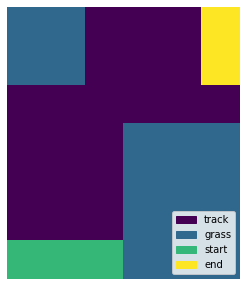

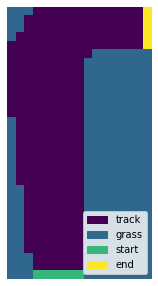

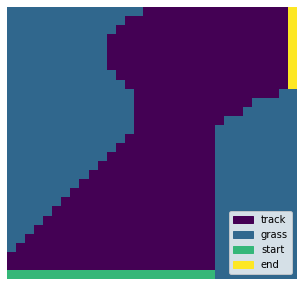

In [ ]:
env_1=Racetrack(TRACK["track_1"])
env_2=Racetrack(TRACK["track_2"])
env_3=Racetrack(TRACK["track_3"])

env_1.show_racetrack(save_path=None, show_legend=True)
env_2.show_racetrack(save_path=None, show_legend=True)
env_3.show_racetrack(save_path=None, show_legend=True)

In [ ]:
agent_1=MonteCarlo(env_1,0.1,init=-100)
agent_2=MonteCarlo(env_2,0.1,init=-100)
agent_3=MonteCarlo(env_3,0.1,init=-100)

t1=agent_1.play_episode(explore=True, learn=True)
t2=agent_2.play_episode(explore=True, learn=True)
t3=agent_3.play_episode(explore=True, learn=True)

### Plot of how we proceed towards the finishing line in an episode

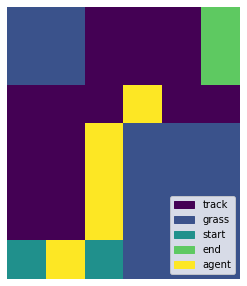

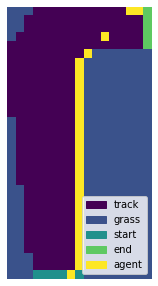

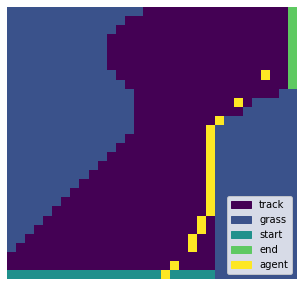

In [ ]:
agent_1.show_sequence(t1[1])
agent_2.show_sequence(t2[1])
agent_3.show_sequence(t3[1])


#### Get return for each of the starting position of a track

In [ ]:
###for_each_starting_coordinate("track_3",0.1)  ## Run this to get results for each starting coordinate of any track, takes time
env_3.start_coordinates    ### Track 3 has 23 starting positions, so to run the above code  it will take some time

[(29, 0),
 (29, 1),
 (29, 2),
 (29, 3),
 (29, 4),
 (29, 5),
 (29, 6),
 (29, 7),
 (29, 8),
 (29, 9),
 (29, 10),
 (29, 11),
 (29, 12),
 (29, 13),
 (29, 14),
 (29, 15),
 (29, 16),
 (29, 17),
 (29, 18),
 (29, 19),
 (29, 20),
 (29, 21),
 (29, 22)]

In [ ]:
env_2.start_coordinates    ### Track 2 has 6 starting positions

[(31, 3), (31, 4), (31, 5), (31, 6), (31, 7), (31, 8)]

## Plots corresponding to Monte Carlo Method

### Plots for different epsilon , for different track
       Mean return vs no of episodes

### Track 2, Epsilon - 0.1

In [ ]:
#plot_1
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_2',0.1)
end=time.time()
print("Time taken:",end-start)

starting state: (31, 8, 0, 0)
Training for 500000 Episodes
Time taken: 393.94862151145935


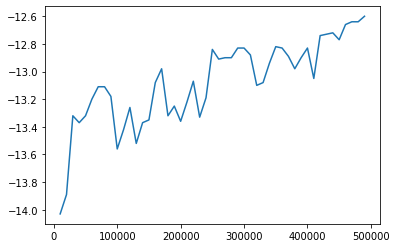

In [ ]:
#plot_1
plt.plot(x_axis, y_axis) 

### Track 2, Epsilon - 0.4

In [ ]:
#plot_2
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_2',0.4)
end=time.time()
print("Time taken:",end-start)

starting state: (31, 8, 0, 0)
Training for 500000 Episodes
Time taken: 405.52411580085754


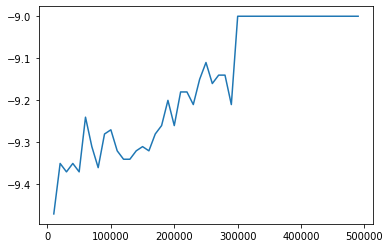

In [ ]:
plt.plot(x_axis, y_axis) 

### Track 3 , Epsilon 0.1

In [ ]:
#plot_3, track 3, epsilon 0.1
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_3',0.1)
end=time.time()
print("Time taken:",end-start)

starting state: (29, 4, 0, 0)
Training for 500000 Episodes
Time taken: 438.08333706855774


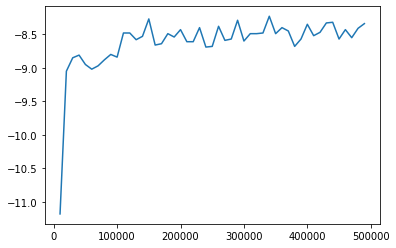

In [ ]:
plt.plot(x_axis, y_axis) 

### Track 3 , Epsilon 0.4

In [ ]:
#plot_4, track 3, epsilon 0.4
# different starting state
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_3',0.4)
end=time.time()
print("Time taken:",end-start)

starting state: (29, 2, 0, 0)
Training for 500000 Episodes
Time taken: 525.5893635749817


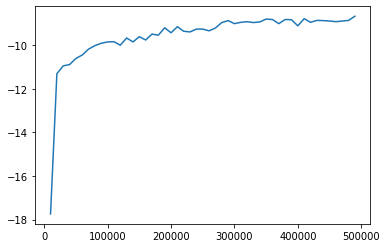

In [ ]:
plt.plot(x_axis, y_axis) 

### Track 1, Epsilon 0.1

In [ ]:
#plot_5
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_1',0.1)
end=time.time()
print("Time taken:",end-start)

starting state: (6, 1, 0, 0)
Training for 500000 Episodes
Time taken: 90.39441061019897


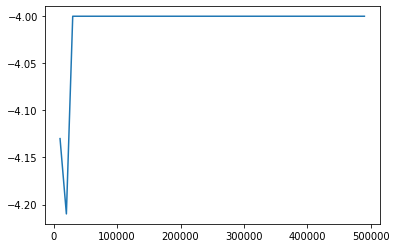

In [ ]:
plt.plot(x_axis, y_axis) 

### Track 1, Epsilon 0.4



starting state: (6, 1, 0, 0)
Training for 500000 Episodes
Time taken: 117.80333161354065


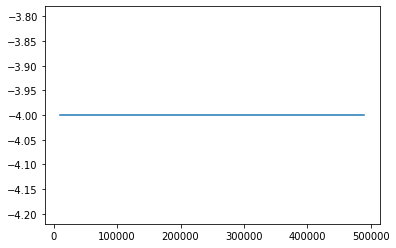

In [ ]:
#plot_6
start=time.time()
y_axis,x_axis=solve_track_by_montecarlo('track_1',0.4)
end=time.time()
print("Time taken:",end-start)
plt.plot(x_axis, y_axis) 

## SARSA

#### Track 2, epsilon 0.1, alpha 0.8

In [ ]:
#plot
start=time.time()
y_axis,x_axis=solve_track_by_SARSA('track_2',epsilon=0.1,alpha=0.8)
end=time.time()
print("Time taken:",end-start)

starting state: (31, 6, 0, 0)
Training for 500000 Episodes
Time taken: 408.20294666290283


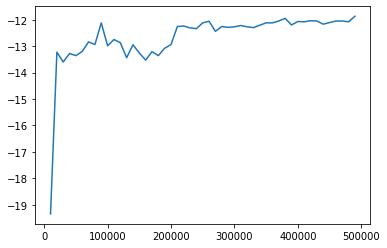

In [ ]:
plt.plot(x_axis, y_axis) 

#### Track 2, epsilon 0.4, alpha 0.8

In [ ]:
#plot
# Result unsatisfactory
start=time.time()
y_axis,x_axis=solve_track_by_SARSA('track_2',epsilon=0.4,alpha=0.8)
end=time.time()
print("Time taken:",end-start)

starting state: (31, 6, 0, 0)
Training for 500000 Episodes
Time taken: 481.22072553634644


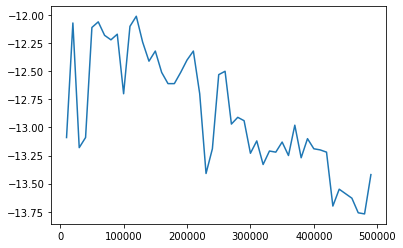

In [ ]:
plt.plot(x_axis, y_axis) 

#### Track 2, epsilon 0.1, alpha 0.5

starting state: (31, 3, 0, 0)
Training for 500000 Episodes


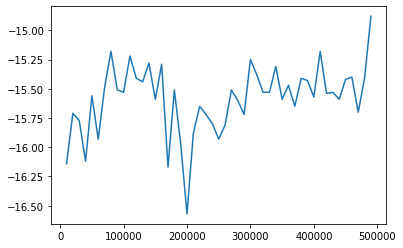

In [ ]:
y_axis,x_axis=solve_track_by_SARSA('track_2',epsilon=0.1,alpha=0.5)
plt.plot(x_axis, y_axis) 

#### Track 2, epsilon 0.1, alpha 0.8

starting state: (31, 3, 0, 0)
Training for 500000 Episodes


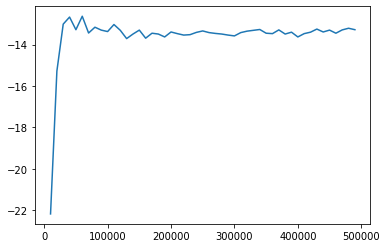

In [ ]:
y_axis,x_axis=solve_track_by_SARSA('track_2',epsilon=0.1,alpha=0.8)
plt.plot(x_axis, y_axis) 

### Comparison of two approaches for track 3 with epsilon 0.1, alpha 0.8

In [ ]:
y_axis_mc,x_axis_mc =solve_track_by_montecarlo('track_3',epsilon=0.1)

starting state: (29, 20, 0, 0)
Training for 500000 Episodes


In [ ]:
y_axis_td,x_axis_td =solve_track_by_SARSA('track_3',epsilon=0.1,alpha=0.8)

starting state: (29, 20, 0, 0)
Training for 500000 Episodes


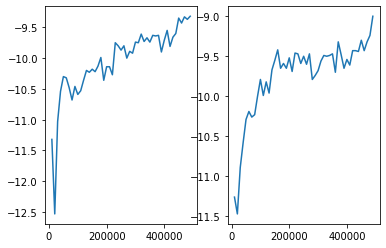

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(x_axis_mc, y_axis_mc) 
plt.subplot(1, 2, 2)
plt.plot(x_axis_td, y_axis_td) 


    Based on the value of epsilon and alpha we are getting different results.(Convergence behaviour changes)
    We can see the comparison of the approaches. Though based on value of alpha, we will get diiferent result.So the comparison is based on particular value of epsilon and alpha.
    From the graphs of comparison,it seems TD converges faster but at the end both doesn't show proper convergence in this case.